# Recommender Systems

## Building an RS for Learning Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
interest = pd.read_csv("interest.csv")
difficulty = pd.read_csv("difficulty.csv")

In [7]:
interest

,id,prediction.interest,nlp.interest,sna.interest,neural.interest,viz.interest,loop.interest,sql.interest
0,s1,5,5.0,4,5.0,2,4.0,5.0
1,s2,5,5.0,5,5.0,5,5.0,5.0
2,s3,5,5.0,5,5.0,5,4.0,4.0
3,s4,4,5.0,5,5.0,5,5.0,5.0
4,s5,4,4.0,4,5.0,4,4.0,5.0
5,s6,5,5.0,5,5.0,5,5.0,5.0
6,s7,4,5.0,3,5.0,4,5.0,4.0
7,s8,4,4.0,3,4.0,5,4.0,4.0
8,s9,5,4.0,2,5.0,5,5.0,5.0
9,s10,5,5.0,5,5.0,5,4.0,5.0


In [5]:
interest.describe()

,prediction.interest,nlp.interest,sna.interest,neural.interest,viz.interest,loop.interest,sql.interest
count,52.000000,51.000000,52.000000,51.000000,52.000000,51.000000,51.000000
mean,4.326923,4.431373,4.134615,4.490196,4.596154,4.431373,4.431373
std,1.042643,0.781150,1.048413,0.809260,0.773574,0.781150,0.922061
min,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000
25%,4.000000,4.000000,3.000000,4.000000,4.750000,4.000000,4.000000
50%,5.000000,5.000000,4.500000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
interest_mean = interest.mean(axis=0)
interest_mean

prediction.interest    4.326923
nlp.interest           4.431373
sna.interest           4.134615
neural.interest        4.490196
viz.interest           4.596154
loop.interest          4.431373
sql.interest           4.431373
dtype: float64

In [23]:
int_mean = pd.DataFrame(interest_mean)
int_mean.index = (['prediction','nlp','sna', 'neural', 'viz', 'loop', 'sql' ])
int_mean.columns = ['interest']
int_mean

,interest
prediction,4.326923
nlp,4.431373
sna,4.134615
neural,4.490196
viz,4.596154
loop,4.431373
sql,4.431373


In [8]:
difficulty

,id,prediction.difficulty,nlp.difficulty,sna.difficulty,neural.difficulty,viz.difficulty,loop.difficulty,sql.difficulty
0,s1,4,5.0,3,5.0,3.0,3.0,5.0
1,s2,5,5.0,5,5.0,5.0,5.0,5.0
2,s3,3,3.0,3,3.0,3.0,3.0,2.0
3,s4,3,4.0,4,4.0,4.0,5.0,3.0
4,s5,4,4.0,4,5.0,4.0,4.0,4.0
5,s6,5,5.0,5,5.0,5.0,5.0,5.0
6,s7,3,4.0,4,4.0,4.0,4.0,4.0
7,s8,4,5.0,4,4.0,4.0,5.0,4.0
8,s9,3,3.0,2,5.0,3.0,4.0,5.0
9,s10,3,5.0,3,4.0,4.0,5.0,2.0


In [9]:
difficulty.describe()

,prediction.difficulty,nlp.difficulty,sna.difficulty,neural.difficulty,viz.difficulty,loop.difficulty,sql.difficulty
count,52.000000,50.00000,52.000000,50.000000,50.000000,50.000000,49.000000
mean,3.807692,4.22000,3.769231,4.400000,4.060000,4.080000,3.693878
std,0.864064,0.86402,0.899137,0.782461,0.818411,0.829064,1.103103
min,2.000000,2.00000,2.000000,2.000000,3.000000,3.000000,1.000000
25%,3.000000,4.00000,3.000000,4.000000,3.000000,3.000000,3.000000
50%,4.000000,4.00000,4.000000,5.000000,4.000000,4.000000,4.000000
75%,5.000000,5.00000,4.250000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [25]:
difficulty_mean = difficulty.mean(axis=0)
difficulty_mean

prediction.difficulty    3.807692
nlp.difficulty           4.220000
sna.difficulty           3.769231
neural.difficulty        4.400000
viz.difficulty           4.060000
loop.difficulty          4.080000
sql.difficulty           3.693878
dtype: float64

In [26]:
dif_mean = pd.DataFrame(difficulty_mean)
dif_mean.index = (['prediction','nlp','sna', 'neural', 'viz', 'loop', 'sql' ])
dif_mean.columns = ['difficulty']
dif_mean

,difficulty
prediction,3.807692
nlp,4.220000
sna,3.769231
neural,4.400000
viz,4.060000
loop,4.080000
sql,3.693878


In [30]:
difficulty_interest = dif_mean.join(int_mean)
difficulty_interest

,difficulty,interest
prediction,3.807692,4.326923
nlp,4.220000,4.431373
sna,3.769231,4.134615
neural,4.400000,4.490196
viz,4.060000,4.596154
loop,4.080000,4.431373
sql,3.693878,4.431373


## Content-Based Recommender

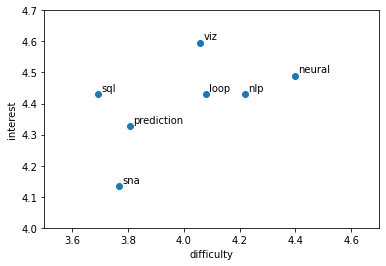

In [31]:
# Plot the basic scatter plot
plt.scatter(difficulty_interest.difficulty, difficulty_interest.interest)

# Add lables to each point
for i, index in enumerate (difficulty_interest.index):
    plt.text(difficulty_interest.difficulty[i]+0.01, difficulty_interest.interest[i]+0.01, index)
    
# Adjust the axis limit and label
plt.xlim (3.5, 4.7)
plt.ylim (4.0, 4.7)
plt.xlabel("difficulty")
plt.ylabel("interest");

In [32]:
import math # You will need math library to calculate the eulidician distance

# Create a new column called distance. And assign 0 to all rows temporarily.
difficulty_interest_distance = difficulty_interest.copy()
difficulty_interest_distance['distance'] = 0

# Pick any row to start. Here I am using prediction as an example
item = difficulty_interest_distance.loc['prediction',]

# Loop around the data frame index; Obtain the target row; Calculate the distance
# Assign to d; And assign to the corresponding cell.
for i in difficulty_interest_distance.index:
    target = difficulty_interest_distance.loc[i,]
    d = math.dist(item, target)
    difficulty_interest_distance.loc[i, 'distance'] = d

# Sort the result by distance
difficulty_interest_distance.sort_values('distance', ascending=True)

,difficulty,interest,distance
prediction,3.807692,4.326923,0.000000
sql,3.693878,4.431373,0.154478
sna,3.769231,4.134615,0.196116
loop,4.080000,4.431373,0.291652
viz,4.060000,4.596154,0.368977
nlp,4.220000,4.431373,0.425332
neural,4.400000,4.490196,0.614399


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(difficulty_interest)
cosine_sim

array([[1.        , 0.99922723, 0.99984605, 0.99856397, 0.99999823,
        0.99974724, 0.99964159],
       [0.99922723, 1.        , 0.99976308, 0.99989801, 0.99929948,
        0.99985835, 0.99781682],
       [0.99984605, 0.99976308, 1.        , 0.99935025, 0.99987732,
        0.99998782, 0.99901794],
       [0.99856397, 0.99989801, 0.99935025, 1.        , 0.99866309,
        0.999516  , 0.99677186],
       [0.99999823, 0.99929948, 0.99987732, 0.99866309, 1.        ,
        0.99978781, 0.99958939],
       [0.99974724, 0.99985835, 0.99998782, 0.999516  , 0.99978781,
        1.        , 0.99878705],
       [0.99964159, 0.99781682, 0.99901794, 0.99677186, 0.99958939,
        0.99878705, 1.        ]])

In [34]:
# Before we move forward, we need to create a index for the module
module_indices = pd.Series(range(len(difficulty_interest.index)), index = difficulty_interest.index)

module_indices

prediction    0
nlp           1
sna           2
neural        3
viz           4
loop          5
sql           6
dtype: int64

In [35]:
def get_recommendations(name, cosine_sim, matrix_indices):
    # Get the index of the movie that matches the title
    idx = matrix_indices[name]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    rank_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return matrix_indices.iloc[rank_indices]

In [36]:
get_recommendations("prediction", cosine_sim, module_indices)

viz     4
sna     2
loop    5
sql     6
nlp     1
dtype: int64

## Collaborative Filter

In [37]:
# First we need to clean up the dataset a little bit: Removing NaNs and naming rows
interest_na = interest.dropna()
interest_na.index = interest_na.id
interest_clean = interest_na.drop('id', axis=1)

In [38]:
# Obtain the cosine similarity matrix
cosine_sim_interest = cosine_similarity(interest_clean, interest_clean)
# Create an index for the student list
id_indices = pd.Series(range(len(interest_clean.index)), index = interest_clean.index)

In [39]:
# Recycle the get_recommendations() that we have created
get_recommendations("s5", cosine_sim_interest, id_indices)

id
s2      1
s6      5
s12    11
s13    12
s16    15
dtype: int64